In [46]:
from keras.datasets import reuters
import numpy as np 
from keras import layers 
from keras import models
from keras.utils import to_categorical
import matplotlib.pyplot as plt

In [47]:
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words = 10000)

In [69]:
word_index = reuters.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_newswire = ' '.join([reverse_word_index.get(i - 3, '?') for i in train_data[10]])
decoded_newswire

'? period ended december 31 shr profit 11 cts vs loss 24 cts net profit 224 271 vs loss 511 349 revs 7 258 688 vs 7 200 349 reuter 3'

In [74]:
def vectorize_sequences(sequences, dimension = 10000):
    result = np.zeros((len(sequences), dimension))
    for i, n in enumerate(sequences):
        result[i, n] = 1. 
    return result 

x_train, x_test = vectorize_sequences(train_data), vectorize_sequences(test_data)
x_train[0]

one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)

In [82]:
model = models.Sequential()
model.add(layers.Dense(64, activation = 'relu', input_shape = (10000, )))
model.add(layers.Dense(64, activation = 'relu'))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(46, activation = 'softmax'))

model.compile(
    optimizer = 'rmsprop', 
    loss = 'categorical_crossentropy', 
    metrics = ['accuracy']
)
x_val = x_train[:1000]
partial_x_train = x_train[1000:]

y_val = one_hot_train_labels[:1000]
partial_y_val = one_hot_train_labels[1000:]

history = model.fit(
    partial_x_train, 
    partial_y_val, 
    epochs = 9, 
    batch_size = 512, 
    validation_data = (x_val, y_val)
)

Epoch 1/9
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.3353 - loss: 3.1325 - val_accuracy: 0.6050 - val_loss: 1.6771
Epoch 2/9
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.6455 - loss: 1.5808 - val_accuracy: 0.7020 - val_loss: 1.3592
Epoch 3/9
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.7237 - loss: 1.2071 - val_accuracy: 0.7150 - val_loss: 1.2065
Epoch 4/9
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7708 - loss: 0.9770 - val_accuracy: 0.7590 - val_loss: 1.1285
Epoch 5/9
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8334 - loss: 0.7565 - val_accuracy: 0.7840 - val_loss: 1.0229
Epoch 6/9
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8597 - loss: 0.6421 - val_accuracy: 0.7920 - val_loss: 1.0051
Epoch 7/9
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8864 - loss: 0.5135 - val_accuracy: 0.7750 - val_loss: 1.0393
Epoch 8/9
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.9014 - loss: 0.4465 - val_accuracy: 0.7910 - val_loss:

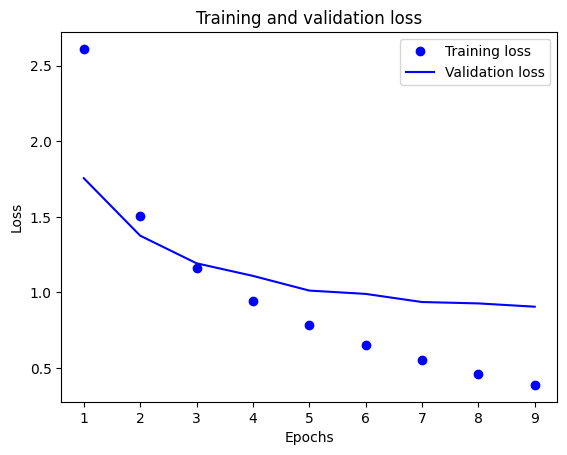

In [31]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

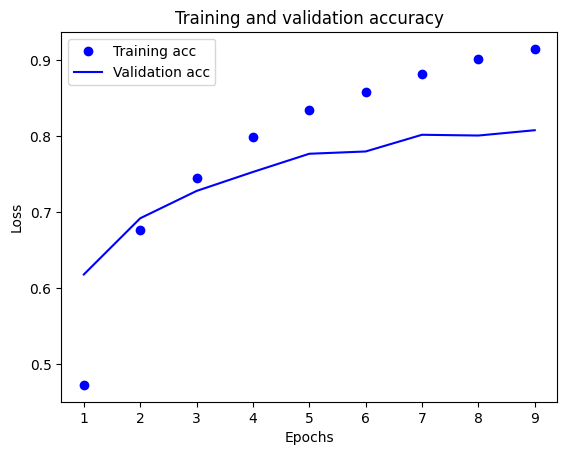

In [32]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [70]:
results = model.evaluate(x_test, one_hot_test_labels)
results

71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 553us/step - accuracy: 0.7930 - loss: 0.9255


[0.9554530382156372, 0.784060537815094]

In [39]:
predictions = model.predict(x_test)
predictions[0].shape #vector of vector of length 46

71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 636us/step


(46,)

In [40]:
np.sum(predictions[0]) #coefficients in this vector sum to 1 

1.0000001

In [43]:
np.argmax(predictions[0]) #largest entry is the predicted class—the class with the highest probability:

3